<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_1_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.2_n20.csv',
 'data_multi_delta_-1.2_n30.csv',
 'data_multi_delta_-1.2_n60.csv',
 'data_multi_delta_-1.2_n120.csv',
 'data_multi_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,26.456165,45.889965,0.081457,82.427588,82.356504,0.071084
1,0.0,1.0,66.011520,26.701349,0.110637,102.823506,102.694549,0.128958
2,0.0,2.0,89.215732,63.952954,-0.083452,163.085234,163.152243,-0.067010
3,0.0,3.0,33.973522,35.622653,-0.082923,79.513252,79.598542,-0.085289
4,0.0,4.0,65.609048,85.574865,0.040705,161.224618,161.188518,0.036100
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,73.369747,79.026003,-0.006948,162.388802,162.402079,-0.013277
119996,999.0,116.0,66.180431,54.723065,0.001401,130.904897,130.905602,-0.000706
119997,999.0,117.0,96.716331,79.222390,-0.108438,185.830283,185.948011,-0.117728
119998,999.0,118.0,37.611898,71.746364,0.090517,119.448779,119.359103,0.089676


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,26.456165,45.889965,0.081457,82.427588,82.356504,0.071084
1,0.0,1.0,66.011520,26.701349,0.110637,102.823506,102.694549,0.128958
2,0.0,2.0,89.215732,63.952954,-0.083452,163.085234,163.152243,-0.067010
3,0.0,3.0,33.973522,35.622653,-0.082923,79.513252,79.598542,-0.085289
4,0.0,4.0,65.609048,85.574865,0.040705,161.224618,161.188518,0.036100
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,73.369747,79.026003,-0.006948,162.388802,162.402079,-0.013277
119996,999.0,116.0,66.180431,54.723065,0.001401,130.904897,130.905602,-0.000706
119997,999.0,117.0,96.716331,79.222390,-0.108438,185.830283,185.948011,-0.117728
119998,999.0,118.0,37.611898,71.746364,0.090517,119.448779,119.359103,0.089676


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    26.456165  45.889965  0.081457   82.427588   82.356504  0.071084
      1.0    66.011520  26.701349  0.110637  102.823506  102.694549  0.128958
      2.0    89.215732  63.952954 -0.083452  163.085234  163.152243 -0.067010
      3.0    33.973522  35.622653 -0.082923   79.513252   79.598542 -0.085289
      4.0    65.609048  85.574865  0.040705  161.224618  161.188518  0.036100
...                ...        ...       ...         ...         ...       ...
999.0 115.0  73.369747  79.026003 -0.006948  162.388802  162.402079 -0.013277
      116.0  66.180431  54.723065  0.001401  130.904897  130.905602 -0.000706
      117.0  96.716331  79.222390 -0.108438  185.830283  185.948011 -0.117728
      118.0  37.611898  71.746364  0.090517  119.448779  119.359103  0.089676
      119.0  21.202504  89.192254 -0.028121  120.366636  120.395918 -0.029282

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    26.456165  45.889965  0.081457   82.427588   82.356504  0.071084
      1.0    66.011520  26.701349  0.110637  102.823506  102.694549  0.128958
      2.0    89.215732  63.952954 -0.083452  163.085234  163.152243 -0.067010
      3.0    33.973522  35.622653 -0.082923   79.513252   79.598542 -0.085289
      4.0    65.609048  85.574865  0.040705  161.224618  161.188518  0.036100
...                ...        ...       ...         ...         ...       ...
999.0 115.0  73.369747  79.026003 -0.006948  162.388802  162.402079 -0.013277
      116.0  66.180431  54.723065  0.001401  130.904897  130.905602 -0.000706
      117.0  96.716331  79.222390 -0.108438  185.830283  185.948011 -0.117728
      118.0  37.611898  71.746364  0.090517  119.448779  119.359103  0.089676
      119.0  21.202504  89.192254 -0.028121  120.366636  120.395918 -0.029282

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,26.456165,45.889965,0.081457,82.427588,82.356504,0.071084
1,0.0,1.0,66.011520,26.701349,0.110637,102.823506,102.694549,0.128958
2,0.0,2.0,89.215732,63.952954,-0.083452,163.085234,163.152243,-0.067010
3,0.0,3.0,33.973522,35.622653,-0.082923,79.513252,79.598542,-0.085289
4,0.0,4.0,65.609048,85.574865,0.040705,161.224618,161.188518,0.036100
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,73.369747,79.026003,-0.006948,162.388802,162.402079,-0.013277
119996,999.0,116.0,66.180431,54.723065,0.001401,130.904897,130.905602,-0.000706
119997,999.0,117.0,96.716331,79.222390,-0.108438,185.830283,185.948011,-0.117728
119998,999.0,118.0,37.611898,71.746364,0.090517,119.448779,119.359103,0.089676


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    26.456165  45.889965  0.081457   82.427588   82.356504  0.071084
      1.0    66.011520  26.701349  0.110637  102.823506  102.694549  0.128958
      2.0    89.215732  63.952954 -0.083452  163.085234  163.152243 -0.067010
      3.0    33.973522  35.622653 -0.082923   79.513252   79.598542 -0.085289
      4.0    65.609048  85.574865  0.040705  161.224618  161.188518  0.036100
...                ...        ...       ...         ...         ...       ...
999.0 115.0  73.369747  79.026003 -0.006948  162.388802  162.402079 -0.013277
      116.0  66.180431  54.723065  0.001401  130.904897  130.905602 -0.000706
      117.0  96.716331  79.222390 -0.108438  185.830283  185.948011 -0.117728
      118.0  37.611898  71.746364  0.090517  119.448779  119.359103  0.089676
      119.0  21.202504  89.192254 -0.028121  120.366636  120.395918 -0.029282

[120000 rows x 6 columns]

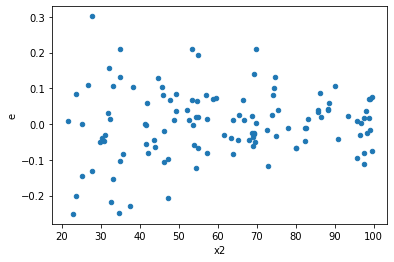

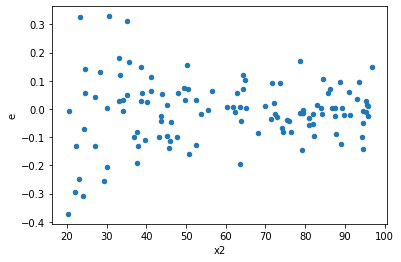

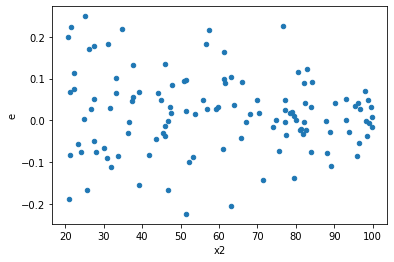

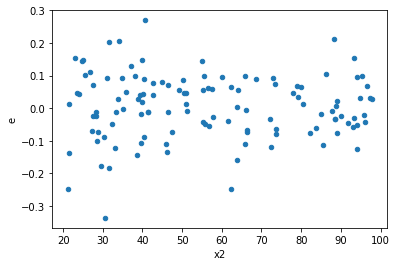

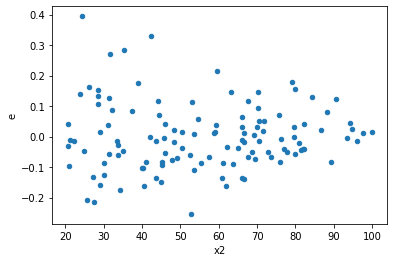

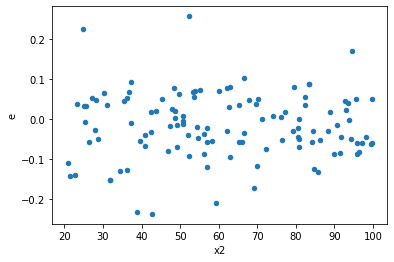

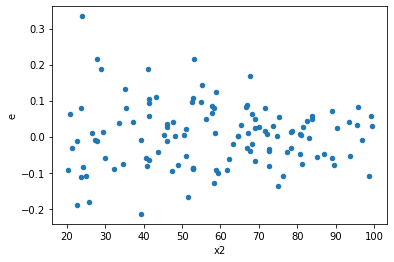

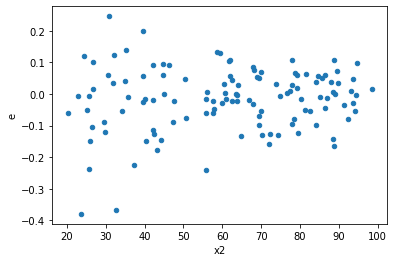

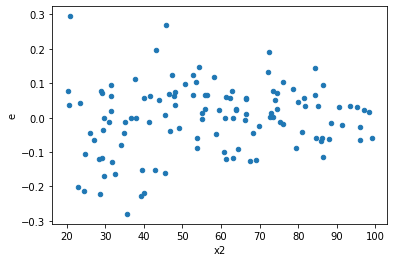

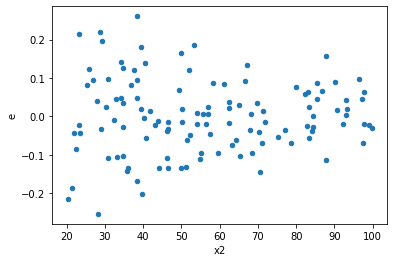

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
101.0,46.0,46.0,0.38211714177493294,0.40558904213900404,0.008306894386411585,0.008817153089978349,1.0614259288527184,0.8406611639864761,0.579669418006762,0.42033058199323803,Reject001=1 : Homoscedasticity
118.0,46.0,46.0,0.3020777496869303,0.4119417702349269,0.006566907601889789,0.008955255874672325,1.3636945146137323,0.29641345157693344,0.8517932742115333,0.14820672578846672,Reject001=1 : Homoscedasticity
146.0,46.0,46.0,0.4276340698178229,0.4696248542679923,0.009296392822126586,0.010209235962347659,1.0981932624499677,0.7521094250615115,0.6239452874692443,0.37605471253075573,Reject001=1 : Homoscedasticity
301.0,46.0,46.0,0.28828718434144285,0.3104690514655271,0.006267112703074845,0.006749327205772328,1.0769436462281736,0.8025979358553594,0.5987010320723203,0.4012989679276797,Reject001=1 : Homoscedasticity
310.0,46.0,46.0,0.3588099697309075,0.39586794316740315,0.007800216733280598,0.008605824851465285,1.1032802222978573,0.7403142003696037,0.6298428998151981,0.37015710018480186,Reject001=1 : Homoscedasticity
332.0,46.0,46.0,0.4139165803370009,0.49819849600601074,0.008998186529065238,0.01083040208708719,1.2036205353271654,0.532201858075239,0.7338990709623805,0.2661009290376195,Reject001=1 : Homoscedasticity
348.0,46.0,46.0,0.43549523069292917,0.4905273444461735,0.00946728762375933,0.010663637922742903,1.1263667426751864,0.6882475642079806,0.6558762178960097,0.3441237821039903,Reject001=1 : Homoscedasticity
452.0,46.0,46.0,0.3382722830430022,0.3571429142655763,0.007353745283543526,0.007763976397077746,1.0557853308370972,0.854735158519808,0.572632420740096,0.427367579259904,Reject001=1 : Homoscedasticity
554.0,46.0,46.0,0.341695965192475,0.3510041574794137,0.007428173156358153,0.007630525162595951,1.0272411536428165,0.9277722401630122,0.5361138799184939,0.4638861200815061,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,0.5610695797903261,0.25880421982595503,0.012197164778050568,0.0056261786918685875,0.4612693846682459,0.009924651325980263,Reject001=0 : Heteroscedasticity
1.0,46.0,46.0,0.8587721059333611,0.2679162394513723,0.018668958824638284,0.005824266075029832,0.311975945190006,0.00013025115755182194,Reject001=0 : Heteroscedasticity
2.0,46.0,46.0,0.6239421261270633,0.15550324272018556,0.013563959263631811,0.003380505276525773,0.24922702957312093,6.282156963351255e-06,Reject001=0 : Heteroscedasticity
3.0,46.0,46.0,0.5955588305601932,0.27882194042121233,0.012946931099134635,0.0060613465308959205,0.4681685941235184,0.011402902644807254,Reject001=1 : Homoscedasticity
4.0,46.0,46.0,0.8557297695020315,0.3446780806431147,0.01860282107613112,0.00749300175311119,0.40278846538632246,0.0025546907996571565,Reject001=0 : Heteroscedasticity
5.0,46.0,46.0,0.3927084221872365,0.25285940217255887,0.00853713961276601,0.0054969435254904105,0.6438858651521355,0.1391626657639946,Reject001=1 : Homoscedasticity
6.0,46.0,46.0,0.5118767832536342,0.16576667928387034,0.011127756157687699,0.0036036234626928335,0.32384098030430347,0.0002078769848422149,Reject001=0 : Heteroscedasticity
7.0,46.0,46.0,0.6623378672998186,0.25970432375394026,0.014398649289126491,0.005645746168563919,0.3921024851148676,0.0019155073705279177,Reject001=0 : Heteroscedasticity
8.0,46.0,46.0,0.5703437310459092,0.3231771620139471,0.012398776761867592,0.007025590478564067,0.566635774923479,0.05700250304232281,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      519
Reject001=0 : Heteroscedasticity    481
Name: Result_test, dtype: int64